Name: Rebecca

Surname: Ghidoni

Numero di matricola: 2026709

# Clothes Classification with Neural Networks

In this notebook we are going to use the Neural Networks for image classification. We are going to use the same dataset of Lab 2 on SVM: Fashion MNIST (https://pravarmahajan.github.io/fashion/), a dataset of small images of clothes and accessories.

The dataset labels are the following:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [1]:
#load the required packages and check Scikit-learn version

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
print ('scikit-learn version: ', sklearn.__version__)
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

scikit-learn version:  0.23.2


In [2]:
# helper function to load Fashion MNIST dataset from disk
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

# TODO 
Place a seed for the random generatoryour (you can use your "numero di matricola"). Try to change the seed to see the impact of the randomization.

In [3]:
ID = 2026709
np.random.seed(ID)

In [4]:
#load the MNIST dataset and let's normalize the features so that each value is in [0,1]
X, y = load_mnist("data")
print("Number of samples in the MNIST dataset:", X.shape[0])
# rescale the data
X = X / 255.0

Number of samples in the MNIST dataset: 60000


Now split into training and test. We start with a small training set of 600 samples to reduce computation time while 4000 samples will be used for testing. Make sure that each label is present at least 10 times in train and test set frequencies.

In [5]:
print(len(y))

60000


In [6]:
#random permute the data and split into training and test taking the first 600
#data samples as training and 4000 as test set
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

labelsT, freqsT = np.unique(y_test, return_counts=True)
print("Labels in test set: ", labels)
print("Frequencies in test set: ", freqs)


#i think it should be:
print("Labels in test set: ", labelsT)
print("Frequencies in test set: ", freqsT)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [66 61 59 63 58 72 45 72 51 53]
Labels in test set:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in test set:  [66 61 59 63 58 72 45 72 51 53]
Labels in test set:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in test set:  [427 416 386 388 400 417 391 400 405 370]


In [7]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


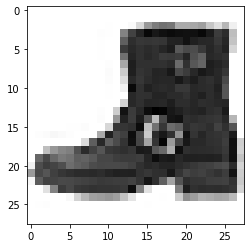

LABEL: 9
INPUT:


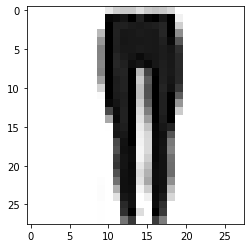

LABEL: 1
INPUT:


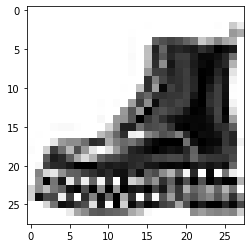

LABEL: 9


In [8]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,100)
plot_input(X_test,y_test,1000)

### TO DO 1

Now use a feed-forward Neural Network for prediction. Use the multi-layer perceptron classifier, with the following parameters: max_iter=250, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID (this last parameter ensures the run is the same even if you run it more than once). The alpha parameter is the regularization term.

Then, using the default activation function, pick four or five architectures to consider, with different numbers of hidden layers and different sizes. It is not necessary to create huge neural networks, you can limit to 3 layers and, for each layer, its maximum size can be of 50. Evaluate the architectures you chose using GridSearchCV with cv=5.

You can reduce the number of iterations if the running time is too long on your computer.


In [9]:
# these are sample values but feel free to change them as you like, try to experiment with different sizes!!
parameters = {'hidden_layer_sizes': [(10,), (20,), (30,), (20,20,), (30,30,20) ]}



#Originally max_iter=250 but it gave me an error so i increase it to 1000

mlp = MLPClassifier(max_iter=250, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1)

#ADD YOUR CODE
a=GridSearchCV(mlp,parameters,cv=5)
prova=a.fit(X_train, y_train)


In [10]:
print ('RESULTS FOR NN\n')

print("Best parameters set found:")
#ADD YOUR CODE
print(prova.best_params_)

print("Score with best parameters:")
#ADD YOUR CODE
print(prova.best_score_)
best= prova.best_score_

print("\nAll scores on the grid:")
#ADD YOUR CODE

dicti=prova.cv_results_
print(dicti["split0_test_score"])
print(dicti["split1_test_score"])
print(dicti["split2_test_score"])
print(dicti["split3_test_score"])




RESULTS FOR NN

Best parameters set found:
{'hidden_layer_sizes': (10,)}
Score with best parameters:
0.7733333333333334

All scores on the grid:
[0.71666667 0.75       0.76666667 0.75833333 0.18333333]
[0.78333333 0.725      0.73333333 0.76666667 0.70833333]
[0.83333333 0.85       0.85       0.84166667 0.50833333]
[0.8        0.775      0.75833333 0.75833333 0.71666667]


### TO DO 2

Now try also different batch sizes, while keeping the best NN architecture you have found above. Remember that the batch size was previously set to the default value, i.e., min(200, n_samples). 
Recall that a batch size of 1 corresponds to baseline SGD, while using all the 480 training samples (there are 600 samples but in cross validation with 5 folders we use 1/5 of them for validation at each round) corresponds to standard GD and using a different mini-batch size lies in the middle between the two extreme cases.

In [11]:
# these are sample values corresponding to baseline SGD, a reasonable mini-batch size and standard GD
# again feel free to change them as you like, try to experiment with different batch sizes!!
parameters = {'batch_size': [1, 32, 480]}

# need to specify that you would like to use the standard k-fold split otherwise sklearn create splits of different sizes
kf = sklearn.model_selection.KFold(n_splits=5)

mlp = MLPClassifier(max_iter=250, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1,hidden_layer_sizes=(30,))

#ADD YOUR CODE
b=GridSearchCV(mlp,parameters,cv=kf)
prova=b.fit(X_train, y_train)


#ADD YOUR CODE

# recall to use cv=kf to use the k-fold subdivision seen in the lectures

#ADD YOUR CODE

In [12]:
print ('RESULTS FOR NN\n')

print("Best parameters set found:")
#ADD YOUR CODE
print(prova.best_params_)

print("Score with best parameters:")
#ADD YOUR CODE
print(prova.best_score_)

print("\nAll scores on the grid:")
#ADD YOUR CODE

dicti=prova.cv_results_
print(dicti["split0_test_score"])
print(dicti["split1_test_score"])
print(dicti["split2_test_score"])
print(dicti["split3_test_score"])

RESULTS FOR NN

Best parameters set found:
{'batch_size': 480}
Score with best parameters:
0.7683333333333333

All scores on the grid:
[0.15       0.75833333 0.775     ]
[0.05       0.74166667 0.70833333]
[0.09166667 0.825      0.825     ]
[0.15       0.78333333 0.75833333]


### QUESTION 1

What do you observe for different architectures and batch sizes? How do the number of layers and their sizes affect the performances? What do you observe for different batch sizes, in particular what happens to the training convergence for different batch sizes (notice that the algorithm could not converge for some batch sizes)?

## [ANSWER TO QUESTION 1]:

We can observe than the best architecture is (10,) and the best batch size is 480.
If we use too layers and too big the results increases.
If the batch size is too small the results are really bad.

### TO DO 3:

Plot the train and test accuracies as a function of the number of learnable parameters in your neural network. Print also the computation time for the various configurations you try (the code for getting the computation time is already provided). You can use 300 iterations (if you get a warning on convergence not reached it is not an issue for this lab)

Training MLP of size (10,) ...


/Users/ghidoni/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Done, training time: 1.21 sec

Training MLP of size (20,) ...
Done, training time: 1.40 sec

Training MLP of size (30,) ...
Done, training time: 1.50 sec

Training MLP of size (30, 20) ...
Done, training time: 0.41 sec

Training MLP of size (30, 30, 20) ...
Done, training time: 0.45 sec



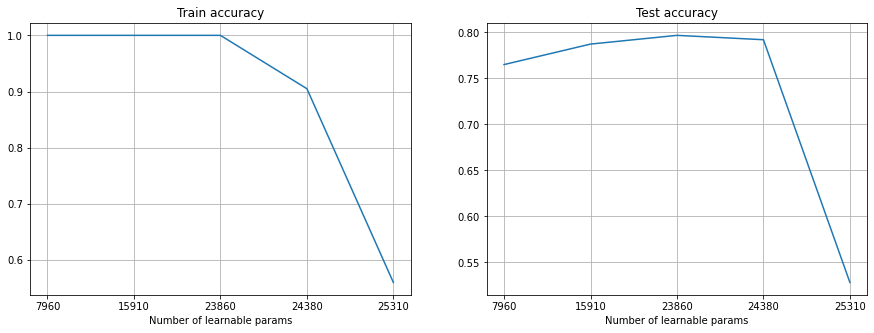

In [13]:
import time
from functools import reduce

# Function to compute the number of learnable parameters of a mlp given the size of its hidden layers
def param_count(hl_size):
    tot = 0
    input_size, output_size = X_train.shape[1], len(labels)
    tot += (input_size+1)*hl_size[0]
    for i in range(1,len(hl_size)):
        tot += (hl_size[i-1]+1)*hl_size[i]
    tot += (hl_size[-1]+1)*output_size
    return tot

hl_sizes = [(10,), (20,), (30,), (30,20,), (30,30,20)]
hl_labels = [param_count(t) for t in hl_sizes]

ti = time.time()
train_acc_list, test_acc_list = [], []
for hl_size in hl_sizes:
    print('Training MLP of size {} ...'.format(hl_size))
    mlp = MLPClassifier(max_iter=250, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1,hidden_layer_sizes=hl_size,batch_size= 480).fit(X_train,y_train)

#ADD YOUR CODE
    
    #ADD YOUR CODE
    
    train_acc_list.append(mlp.score(X_train, y_train))
    test_acc_list.append(mlp.score(X_test, y_test))
    print('Done, training time: {:.2f} sec\n'.format(time.time()-ti))
    ti = time.time()

fig, ax = plt.subplots(1,2, figsize=(15,5))


ax[0].plot(train_acc_list)
ax[0].set_xlabel('Number of learnable params')
ax[0].set_title('Train accuracy')
ax[0].set_xticks(np.arange(0,len(hl_labels)))
ax[0].set_xticklabels(hl_labels)
ax[0].grid(True)

ax[1].plot(test_acc_list)
ax[1].set_xlabel('Number of learnable params')
ax[1].set_title('Test accuracy')
ax[1].set_xticks(np.arange(0,len(hl_labels)))
ax[1].set_xticklabels(hl_labels)
ax[1].grid(True)


## Question 2:

Comment about the training and test accuracies referring to the discussion on underfitting and overfitting we did in the course

## [ANSWER TO QUESTION 2]:
Increasing the number of learnable parameters whe fall in the overfitting. For number of learnable pameters grater than 23860 both train and test accuracy decrease. For number of learnable pameters smaller than 23860 the train accuracy is always equal 1 but the test accuracy decreases a little. This is the "underfitting" phenomena

### TO DO 4

Now try also to use different learning rates, while keeping the best NN architecture and batch size you have found above. Plot the learning curves (i.e., the variation of the loss over the steps, you can get it from the loss_curve_ object of sklearn) for the different values of the learning rate. Try to run each training for 600 iterations. 

79.35


/Users/ghidoni/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


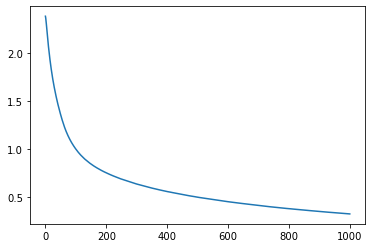

79.725


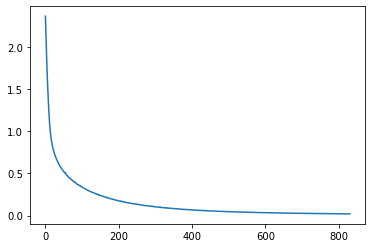

79.675


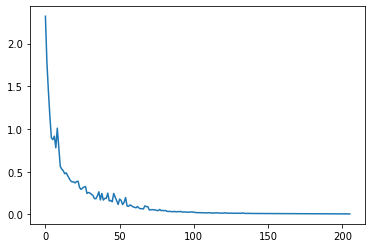

In [14]:
import matplotlib.pyplot as plt
import operator

#lr_list = [0.001, 0.01, 0.1]
lr_list = [10**exp for exp in range(-3,0)]
scores = {}
parameters={'learning_rate_init':[0.001, 0.01, 0.1]}
train_acc_list=[]
test_acc_list=[]
#ADD YOUR CODE

for i in lr_list:
    
    mlp = MLPClassifier(max_iter=1000, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,hidden_layer_sizes=(30,),batch_size=480,learning_rate_init=i)
    mlp.fit(X_train,y_train)
    
#ADD YOUR CODE
    
    #ADD YOUR CODE

    prd_r = mlp.predict(X_train)
    test_acc = mlp.score(X_test, y_test) * 100
    print(test_acc)
    loss_values = mlp.loss_curve_
    #train_acc_list.append(mlp.predict(X_train,y_train))
    #test_acc_list.apped(mlp.predict(X_test,y_test))

    plt.plot(loss_values)
    plt.show()

### QUESTION 3

Comment about the learning curves (i.e. the variation of the loss over the steps). How does the curve changes for different learning rates in terms of stability and speed of convergence ?

## [ANSWER TO QUESTION 3]:

Increasing the learning rate we can converge faster, but the curve becomes more noisy

### TO DO 5

Now get training and test error for a NN with best parameters (architecture, batch size and learning rate) from above. Plot the learning curve also for this case.


RESULTS FOR BEST NN

Best NN training error: 0.000000
Best NN test error: 0.204250


/Users/ghidoni/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


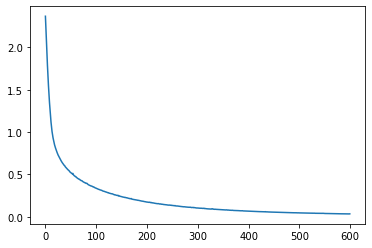

In [15]:
#get training and test error for the best NN model from CV
mlp = MLPClassifier(max_iter=600, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,hidden_layer_sizes=(30,),batch_size=480,learning_rate_init=0.01)
mlp.fit(X_train,y_train)
test_error= 1 - mlp.score(X_test,y_test)


training_error=1-mlp.score(X_train,y_train)
#ADD YOUR CODE

print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

#ADD YOUR CODE FOR PLOTTING
loss_values = mlp.loss_curve_
    
plt.plot(loss_values)
plt.show()

## More data 
Now let's do the same but using 4000 (or less if it takes too long on your machine) data points for training. Use the same NN architecture as before, but you can try more if you like and have a powerful computer!!

In [16]:
X = X[permutation]
y = y[permutation]

m_training = 4000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [393 390 388 364 412 410 430 405 414 394]


### TO DO 6

Now train the NNs with the added data points using the optimum parameters found above. Eventually, feel free to try different architectures if you like. We suggest that you use 'verbose=True' so have an idea of how long it takes to run 1 iteration (eventually reduce also the number of iterations to 50).

/Users/ghidoni/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(



RESULTS FOR NN

NN training error: 0.007500
NN test error: 0.171161


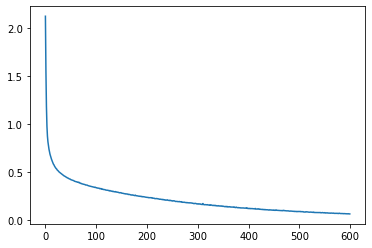

In [17]:
# use best architecture and params from before



mlp_large = MLPClassifier(max_iter=600, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,hidden_layer_sizes=(30,),batch_size=480,learning_rate_init=0.01)
mlp_large.fit(X_train,y_train)
test_error= 1 - mlp_large.score(X_test,y_test)


training_error=1-mlp_large.score(X_train,y_train)
#ADD YOUR CODE

print ('\nRESULTS FOR NN\n')

#get training and test error for the NN

#ADD YOUR CODE

print ("NN training error: %f" % training_error)
print ("NN test error: %f" % test_error)

loss_values = mlp_large.loss_curve_
    
plt.plot(loss_values)
plt.show()

## QUESTION 4
Compare the train and test error you got with a large number of samples with the best one you obtained with only 600 data points. Comment about the results you obtained.

#### [ANSWER TO QUESTION 4]:

Using 600 data poits we can obtain a training error of zero, but the test error is over the 20%. Using 4000 samples the training error is bigger, but the test error decreases to 17%

### TO DO 7

Plot an example that was missclassified by NN with m=600 training data points and it is now instead correctly classified by NN with m=4000 training data points.

INPUT:


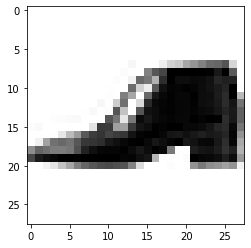

LABEL: 9
9
5


In [18]:
#NN_prediction = #ADD YOUR CODE
#large_NN_prediction = #ADD YOUR CODE

#ADD YOUR CODE
large_NN_prediction = mlp_large.predict(X_test)


m_training = 600

X_train1, X_test1 = X[:m_training], X_test
y_train1, y_test1 = y[:m_training], y_test

NN_prediction = mlp.predict(X_test1)

for i in range(len(NN_prediction)):
    if NN_prediction[i]!=y_test1[i] and large_NN_prediction[i]==y_test[i]:
        #if LR_prediction[i]!=y_test[i]:
        plot_input(X_test1,y_test1,i)
        break
print(large_NN_prediction[i])
print(NN_prediction[i])

### TO DO 8

Let's plot the weigths of the multi-layer perceptron classifier, for the best NN we get with 600 data points and with 4000 data points. The code is already provided, just fix variable names (e.g., replace mlp , mlp_large with your estimators) in order to have it working with your implementation



Weights with 600 data points:


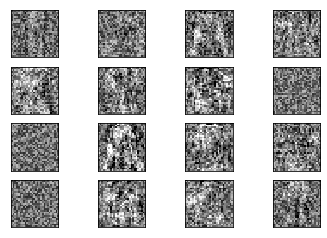

Weights with 4000 data points:


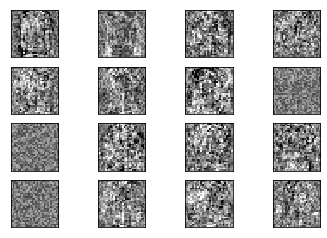

In [19]:
print("Weights with 600 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

print("Weights with 4000 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp_large.coefs_[0].min(), mlp_large.coefs_[0].max()
for coef, ax in zip(mlp_large.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

## QUESTION 5

Describe what do you observe by looking at the weights.

##### [ANSWER TO QUESTION 5]:

Both sets of weights are very confusing, but the first one is a bit darker than the second one.

### TO DO 9

Take the best SVM model and its parameters, you found in the last notebook. Fit it on a few data points and compute its training and test scores. Then fit also a logistic regression model with C=1. 

In [20]:
m_training = 5000
X = X[permutation]
y = y[permutation]
X_train, X_test = X[:m_training], X[m_training:2*m_training]
y_train, y_test = y[:m_training], y[m_training:2*m_training]

In [21]:


# use best parameters found in the SVM notebook, create SVM and perform fitting


My_svm = SVC(kernel="rbf",C=1.0,gamma=10**(-2))
My_svm.fit(X_train,y_train)
train_acc=My_svm.score(X_train,y_train)
test_acc=My_svm.score(X_test,y_test)
SVM_training_error =  1-train_acc



SVM_test_error = 1-test_acc

In [22]:
from sklearn import linear_model

#regL2 = #ADD YOUR CODE

# you can re-use your code from Lab 2
regL2=linear_model.LogisticRegression(C=1)
j=regL2.fit(X_train,y_train)
# ADD YOUR CODE
reg_training_error=1-j.score(X_train,y_train)

reg_test_error=1-j.score(X_test,y_test)

#ADD YOUR CODE


/Users/ghidoni/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
mlp_large = MLPClassifier(max_iter=600, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,hidden_layer_sizes=(30,),batch_size=480,learning_rate_init=0.1)
mlp_large.fit(X_train,y_train)
NN_test_error= 1 - mlp_large.score(X_test,y_test)


NN_training_error=1-mlp_large.score(X_train,y_train)
#ADD YOUR CODE



In [24]:
print ('RESULTS FOR SVM')
print("Training score SVM:%f" % SVM_training_error)
print("Test score SVM:%f" % SVM_test_error)




print ('\nRESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION')
print ("Training error (reg): %f" % reg_training_error)
print ("Test error (reg): %f" % reg_test_error)


print ('\nRESULTS FOR NN')
print ("NN training error: %f" % NN_training_error)
print ("NN test error: %f" % NN_test_error)

RESULTS FOR SVM
Training score SVM:0.111000
Test score SVM:0.160600

RESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION
Training error (reg): 0.073800
Test error (reg): 0.181800

RESULTS FOR NN
NN training error: 0.030800
NN test error: 0.164600


## QUESTION 6
Compare the results of Logistic Regression, SVM and NN. Which one achieve the best results? 

###### [ANSWER TO QUESTION 6]:

We can achieve the best result for the training error using the neural networks. But the best test error is obtained using the SVM method.